In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\spotify data\spotify_data.csv")
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
df.shape

(1159764, 20)

In [4]:
df.isna().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df = df[df['popularity']>=40]

In [7]:
df.shape

(133376, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133376 entries, 0 to 1159051
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        133376 non-null  int64  
 1   artist_name       133376 non-null  object 
 2   track_name        133376 non-null  object 
 3   track_id          133376 non-null  object 
 4   popularity        133376 non-null  int64  
 5   year              133376 non-null  int64  
 6   genre             133376 non-null  object 
 7   danceability      133376 non-null  float64
 8   energy            133376 non-null  float64
 9   key               133376 non-null  int64  
 10  loudness          133376 non-null  float64
 11  mode              133376 non-null  int64  
 12  speechiness       133376 non-null  float64
 13  acousticness      133376 non-null  float64
 14  instrumentalness  133376 non-null  float64
 15  liveness          133376 non-null  float64
 16  valence           133376

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(['Unnamed: 0', 'track_id'],axis='columns')
df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [11]:
df_corr = df.drop(['artist_name','track_name','genre'],axis='columns')
corr = df_corr.corr()

<Axes: >

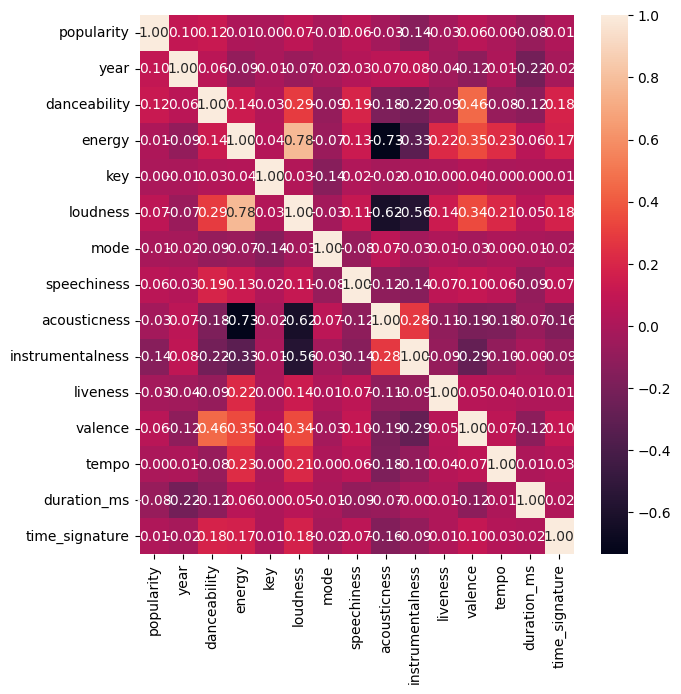

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True,fmt='.2f')

In [13]:
le = LabelEncoder()

In [14]:
df['genre'] = le.fit_transform(df['genre'])
df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,68,2012,0,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,50,2012,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,57,2012,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,58,2012,0,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,54,2012,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [15]:
scaler = StandardScaler()

In [16]:
df[['popularity','year','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']] = scaler.fit_transform(df[['popularity','year','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']])

In [17]:
df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,2.298437,-0.691053,0,-0.694686,-1.396563,-0.363900,-0.443309,1,-0.505057,1.296557,-0.447113,-0.482075,-1.346458,0.402093,0.335762,-2.315590
1,Jason Mraz,93 Million Miles,0.085543,-0.691053,0,-0.154287,-0.764477,-0.643653,-0.487705,1,-0.686649,0.600469,-0.447065,-0.587974,0.188575,0.630447,0.018102,0.205134
2,Joshua Hyslop,Do Not Let Me Go,0.946113,-0.691053,0,-1.144007,-1.685397,-0.643653,-1.154614,1,-0.617623,0.154588,-0.446937,-0.635508,-1.321963,0.618652,-0.749058,0.205134
3,Boyce Avenue,Fast Car,1.069051,-0.691053,0,-1.247229,-1.614235,1.314620,-0.401834,1,-0.575145,1.659036,-0.447113,-0.694474,0.159997,2.813524,1.192426,0.205134
4,Andrew Belle,Sky's Still Blue,0.577297,-0.691053,0,-1.016497,0.646204,0.195607,0.459988,0,-0.639923,-0.696757,-0.379190,-0.512160,-1.028020,1.698143,0.391255,0.205134


In [18]:
km = KMeans()

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df.drop(['artist_name','track_name'], axis=1))
    sse.append(km.inertia_)

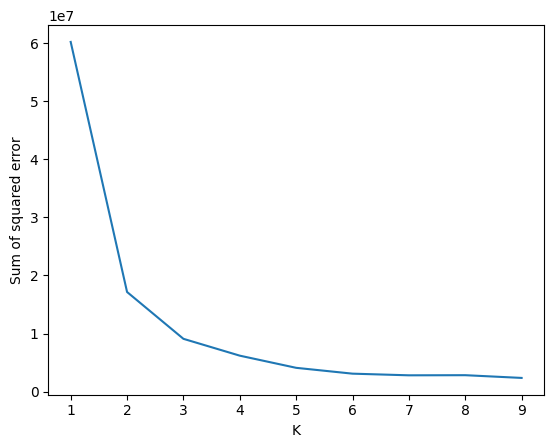

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [21]:
num = df[['popularity','year','danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature']] 

In [22]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(num)

In [23]:
df['clusters'] = clusters

In [24]:
df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,Jason Mraz,I Won't Give Up,2.298437,-0.691053,0,-0.694686,-1.396563,-0.363900,-0.443309,1,-0.505057,1.296557,-0.447113,-0.482075,-1.346458,0.402093,0.335762,-2.315590,2
1,Jason Mraz,93 Million Miles,0.085543,-0.691053,0,-0.154287,-0.764477,-0.643653,-0.487705,1,-0.686649,0.600469,-0.447065,-0.587974,0.188575,0.630447,0.018102,0.205134,1
2,Joshua Hyslop,Do Not Let Me Go,0.946113,-0.691053,0,-1.144007,-1.685397,-0.643653,-1.154614,1,-0.617623,0.154588,-0.446937,-0.635508,-1.321963,0.618652,-0.749058,0.205134,2
3,Boyce Avenue,Fast Car,1.069051,-0.691053,0,-1.247229,-1.614235,1.314620,-0.401834,1,-0.575145,1.659036,-0.447113,-0.694474,0.159997,2.813524,1.192426,0.205134,2
4,Andrew Belle,Sky's Still Blue,0.577297,-0.691053,0,-1.016497,0.646204,0.195607,0.459988,0,-0.639923,-0.696757,-0.379190,-0.512160,-1.028020,1.698143,0.391255,0.205134,1


In [25]:
X = df.select_dtypes(np.number).drop(columns = ['clusters','year']).copy()
y = df['clusters']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(f"X train shape;{X_train.shape}, y train shape:{y_train.shape}")
print(f"X test shape:{X_test.shape}, y test shape:{y_test.shape}")

X train shape;(106700, 15), y train shape:(106700,)
X test shape:(26676, 15), y test shape:(26676,)


In [27]:
knn= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=3)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=3)

In [29]:
y_pred = knn.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.9470310391363023

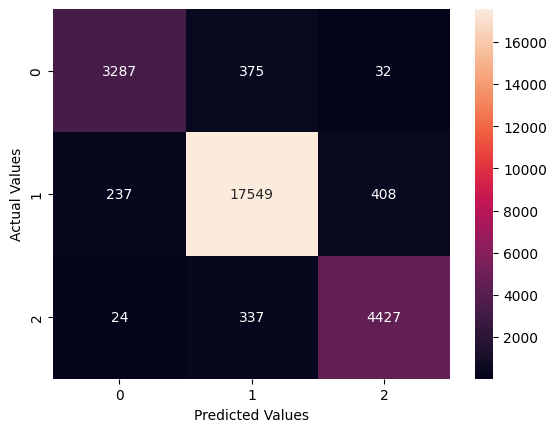

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3694
           1       0.96      0.96      0.96     18194
           2       0.91      0.92      0.92      4788

    accuracy                           0.95     26676
   macro avg       0.93      0.93      0.93     26676
weighted avg       0.95      0.95      0.95     26676



In [33]:
from fuzzywuzzy import process

In [34]:
recommendation_set = df.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,Jason Mraz,93 Million Miles,0.085543,-0.691053,0,-0.154287,-0.764477,-0.643653,-0.487705,1,-0.686649,0.600469,-0.447065,-0.587974,0.188575,0.630447,0.018102,0.205134,1
1,Jason Mraz,Living in the Moment,-0.652088,-0.691053,0,0.319322,-0.036114,0.475360,0.120984,1,-0.714259,-0.774706,-0.447113,-0.458007,0.943843,-1.258156,0.267819,0.205134,1
2,Ron Pope,One Grain of Sand,-0.037395,-0.691053,0,0.701852,0.784342,-0.643653,0.119426,1,-0.543287,-0.589617,-0.446830,-0.391821,0.927513,-0.048750,-0.104092,0.205134,1
3,Boyce Avenue,Payphone,-1.020903,-0.691053,0,0.319322,0.076908,0.475360,0.471866,1,-0.632490,-0.246385,-0.447113,-0.367753,0.315133,-0.389023,0.041306,0.205134,1
4,Boyce Avenue,Without You,-1.143842,-0.691053,0,-0.518601,-1.040753,-1.203160,-0.163304,1,-0.632490,1.165038,-0.447113,-0.623474,-1.232147,0.126323,-0.087353,0.205134,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26677,Carlos Baute,Amarte bien (feat. Juan Magán),-0.652088,-0.858013,73,0.805074,0.813644,-0.363900,0.496985,1,-0.597446,-0.246385,-0.447113,0.606996,1.621544,0.288624,-0.603634,0.205134,1
26678,Manel,Benvolgut,-0.283272,-0.858013,73,0.713995,-0.454713,-0.923407,-0.340692,1,-0.544349,1.415245,-0.447113,-0.536228,1.576636,0.286029,0.537494,0.205134,1
26679,Los De Marras,Escápate,-1.020903,-0.858013,73,-0.318228,1.194570,-0.923407,0.800161,1,-0.292668,-0.926847,-0.446961,0.835641,1.752185,1.470328,-0.314628,0.205134,1
26680,Stefan Andersson,113 officerare,-1.143842,-0.858013,74,0.495407,-0.823081,1.594374,-0.412543,0,-0.421163,1.302973,-0.447113,-0.624076,0.062016,-0.096201,0.553699,0.205134,1


In [35]:
def recommender(song_name, data, model, recommendation_set):
    idx = process.extractOne(song_name, recommendation_set['track_name'])[2]
    print('Song Selected:-', recommendation_set['track_name'][idx], 'Index: ', idx)
    print('Searching for recommendations.....')
    requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns=['clusters', 'year']).copy()
    distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1, -1))
    
    print("Indices returned by model:", indices)
    
    # Check for valid indices
    valid_indices = [i for i in indices[0] if i < len(data)]
    print("Valid indices:", valid_indices)
    
    for i in valid_indices:
        print(data['track_name'].iloc[i] + "      " + data['artist_name'].iloc[i])

def get_song_info(row_number, recommendation_set):
    song_info = recommendation_set.loc[row_number, ["track_name", "artist_name"]]
    return song_info

song_info = get_song_info(2, recommendation_set)
print("Song name: ", song_info["track_name"])
print("Artist name: ", song_info["artist_name"])
song_name = song_info["track_name"]
recommender(song_name, df, knn, recommendation_set)

Song name:  One Grain of Sand
Artist name:  Ron Pope
Song Selected:- One Grain of Sand Index:  2
Searching for recommendations.....
Indices returned by model: [[69196 97907 60897]]
Valid indices: [69196, 97907, 60897]
So Sweet      Pink Sweat$
Rei do Agro      Antony & Gabriel
Ailleurs (feat. Maes)      Timal


c:\Users\SIDDHARTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
